# Import libraries

In [1]:
# libraries needed
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
%pip install kagglehub[pandas-datasets]
# @pip install kagglehub[pandas-datasets]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# load the dataset
## either from sklearn.datasets or from a csv file using pandas
## for sklearn.datasets
# from sklearn.datasets import load_breast_cancer

# lets say we got a CSV file
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
path = kagglehub.dataset_download("camnugent/california-housing-prices")

c:\Users\praty\Desktop\house price prediction\aiml-lab-viva\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
path

'C:\\Users\\praty\\.cache\\kagglehub\\datasets\\camnugent\\california-housing-prices\\versions\\1'

In [5]:
import pandas as pd
df = pd.read_csv(path + "/housing.csv")

# Understand the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [9]:
df.shape

(20640, 10)

In [10]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# preprocess

In [11]:
# Handle missing values
df.dropna(inplace=True)    # Drop rows with missing values

In [12]:
# get numerical and categorical column names
numeric_cols = df.select_dtypes(include='number').columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

numeric_cols, categorical_cols

(['longitude',
  'latitude',
  'housing_median_age',
  'total_rooms',
  'total_bedrooms',
  'population',
  'households',
  'median_income',
  'median_house_value'],
 ['ocean_proximity'])

In [13]:
# handling categorical column
df = pd.get_dummies(df, drop_first=True)

In [14]:
# Define features X and target y
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

In [15]:
X.shape

(20433, 12)

In [16]:
y.shape

(20433,)

In [17]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (16346, 12) Test shape: (4087, 12)


# Train the model

In [22]:
# Train the Linear Regression model
model_ran = RandomForestRegressor(random_state=42, n_estimators=200)

model_ran.fit(X_train, y_train) # Train the model

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# Make Predictions

In [23]:
y_pred_ran = model_ran.predict(X_test)

# Evaluate the Model

In [25]:
import numpy as np

In [26]:
# Evaluation metrics for Random Forest
mae_ran = mean_absolute_error(y_test, y_pred_ran)
mse_ran = mean_squared_error(y_test, y_pred_ran)
rmse_ran = np.sqrt(mse_ran)
r2_ran = r2_score(y_test, y_pred_ran)

print("Random Forest Model Performance:")
print("Mean Absolute Error:", round(mae_ran, 2))
print("Mean Squared Error:", round(mse_ran, 2))
print("RMSE:", round(rmse_ran, 2))
print("R² Score:", round(r2_ran, 3))

Random Forest Model Performance:
Mean Absolute Error: 31663.84
Mean Squared Error: 2377334334.11
RMSE: 48757.92
R² Score: 0.826


# Plots

In [ ]:
# %pip install matplotlib seaborn

In [28]:
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns

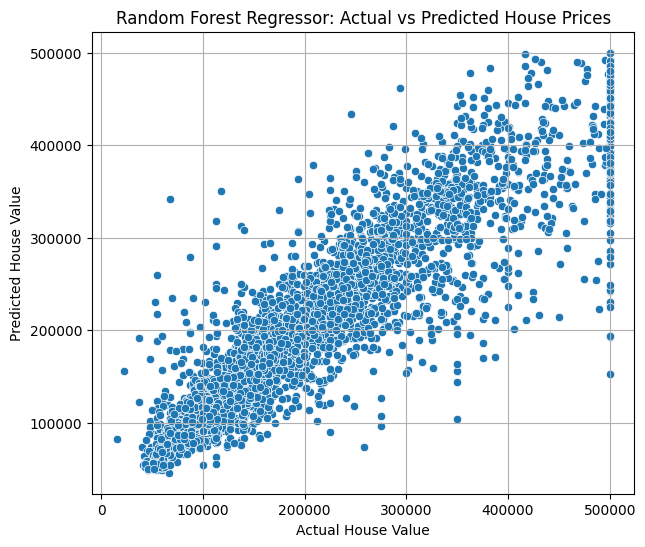

In [30]:
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred_ran)
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Random Forest Regressor: Actual vs Predicted House Prices")
plt.grid(True)
plt.show()

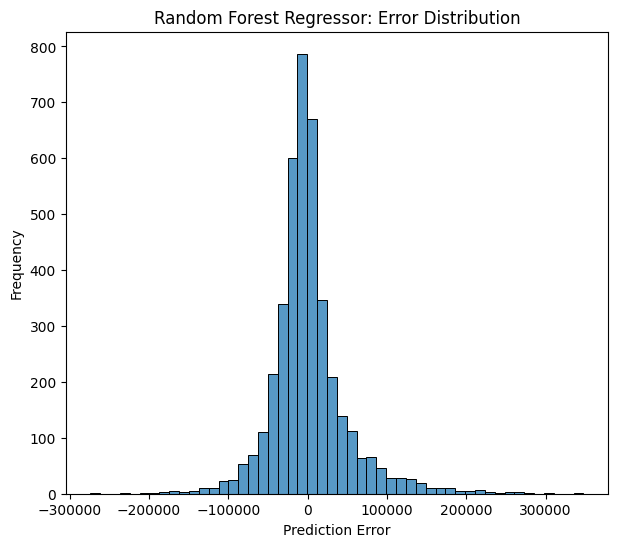

In [31]:
# error distribution
errors_ran = y_test - y_pred_ran
plt.figure(figsize=(7,6))
sns.histplot(errors_ran, bins=50)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Random Forest Regressor: Error Distribution")
plt.show()